<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jisha_Obukwelu_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

### Looking at Data

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

#UPLOAD RAW URL

persons_data = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

In [0]:
import matplotlib.pyplot as plt

In [3]:
#DOWNLOAD PANDAS
import pandas as pd

#DEFINE CSV AS DF, EXAMINE DATA
df = pd.read_csv(persons_data)
df.head(20)

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [4]:
df.shape

(1200, 4)

In [5]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [6]:
#FIND ANY NULL VALUES
null_value = df.isnull()
null_value.head()

#NO NULL VALUES

,Unnamed: 0,age,weight,exercise_time
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [19]:
pd.__version__

'0.23.4'

In [7]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 9.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


### Exploring Relationships

In [12]:
df[['weight', 'exercise_time']]

,weight,exercise_time
0,118,192
1,161,35
2,128,220
3,216,57
4,116,182
5,103,165
6,161,107
7,188,37
8,216,79
9,127,267


### Weight and Exercise Time

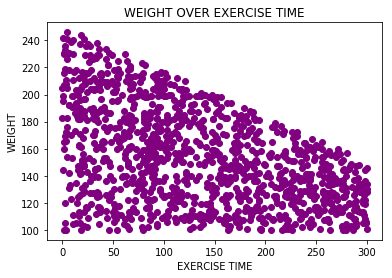

In [16]:
plt.scatter(df['exercise_time'], df['weight'], marker='o', color='purple')
plt.title('WEIGHT OVER EXERCISE TIME')
plt.xlabel('EXERCISE TIME')
plt.ylabel('WEIGHT')
plt.show()

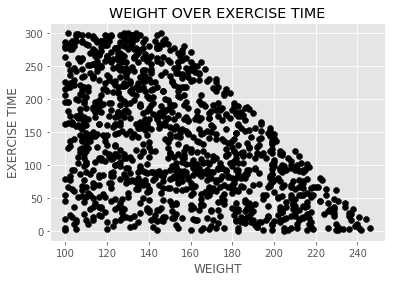

In [64]:
plt.scatter(df['weight'], df['exercise_time'], marker='o', color='black')
plt.title('WEIGHT OVER EXERCISE TIME')
plt.xlabel('WEIGHT')
plt.ylabel('EXERCISE TIME')
plt.show()

In [8]:
#WANT TO EXAMINE IF EXERCISE TIME AND WEIGHT ARE RELATED OR IF IT IS A CONFOUNDING VARIABLE 
#CREATING A TIME BINS OF EXERCISE_TIMES

time_bins = pd.cut(df['exercise_time'],10)
pd.crosstab(df['weight'], time_bins)

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
weight,,,,,,,,,,
100,3,2,1,0,0,1,2,2,1,3
101,0,0,1,0,1,1,3,2,1,1
102,1,0,2,0,2,1,0,3,1,3
103,1,0,1,1,0,2,0,0,0,3
104,1,1,1,1,1,0,0,2,1,1
105,3,0,0,0,0,2,1,0,1,3
106,0,1,0,2,0,2,1,0,1,1
107,0,0,1,1,2,2,2,1,2,0
108,0,1,2,0,3,3,2,2,3,3


In [9]:
#CREATED BINS FOR WEIGHT CATEGORY AS WELL
weight_bins = pd.cut(df['weight'], 10)
pd.crosstab(weight_bins, time_bins)

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
weight,,,,,,,,,,
"(99.854, 114.6]",14,13,16,12,21,20,18,20,17,28
"(114.6, 129.2]",12,14,15,22,13,17,19,22,37,25
"(129.2, 143.8]",11,10,22,10,11,21,17,22,20,22
"(143.8, 158.4]",14,9,25,19,12,23,15,20,17,15
"(158.4, 173.0]",13,18,24,23,14,14,12,13,9,1
"(173.0, 187.6]",15,15,23,23,13,15,12,1,0,0
"(187.6, 202.2]",19,11,15,16,19,8,1,0,0,0
"(202.2, 216.8]",22,24,16,26,2,0,0,0,0,0
"(216.8, 231.4]",16,12,8,1,0,0,0,0,0,0


In [10]:
#MAKING SMALLER AMOUNT OF BINS TO SEE IF THERE IS MORE OF A CORRELATION
weight_bins = pd.cut(df['weight'], 5)
time_bins = pd.cut(df['exercise_time'],5)
pd.crosstab(time_bins, weight_bins)

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",53,44,61,76,44
"(60.0, 120.0]",65,76,93,73,9
"(120.0, 180.0]",71,67,56,29,0
"(180.0, 240.0]",79,74,38,1,0
"(240.0, 300.0]",107,74,10,0,0


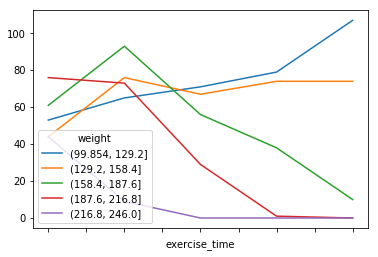

In [24]:
#NOT USEFUL _ TOO MANY DASHES ALONG THE EXERCISE LINE
corr_1 = pd.crosstab(time_bins, weight_bins)
corr_1.plot()

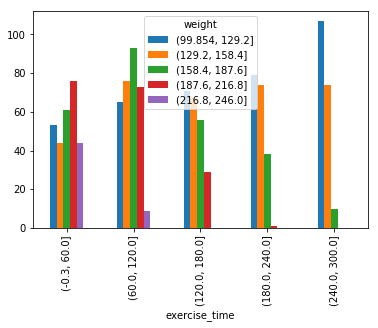

In [25]:
corr_1.plot(kind = 'bar')

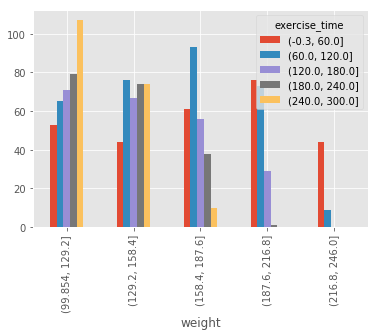

In [63]:
corr_1_1 = pd.crosstab(weight_bins, time_bins)
corr_1_1.plot(kind = 'bar')

### Age and Exercise Time

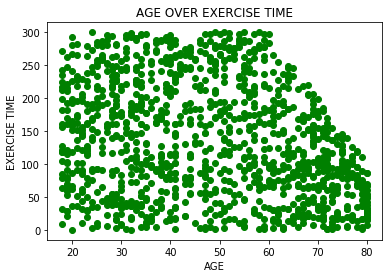

In [32]:
#CHECKING CORRELATION BETWEEN AGE AND WEIGHT
plt.scatter(df['age'],df['exercise_time'],  marker='o', color='green')
plt.title('AGE OVER EXERCISE TIME')
plt.xlabel('AGE')
plt.ylabel('EXERCISE TIME')
plt.show()

In [65]:
#CROSSTAB OF AGE AND EXERCISE TIME
#DOES NOT WORK?
pd.crosstab(df['age'], time_bins)


exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
18,2,6,4,6,2
19,5,8,3,5,2
20,2,4,3,4,4
21,2,2,6,6,2
22,4,5,6,4,0
23,4,4,7,4,2
24,3,3,5,3,3
25,4,2,2,6,5
26,1,3,2,3,6


In [73]:
#CREATE BIN FOR AGE TO TRY AND COMPARE
age_bins = pd.cut(df['age'], 10)
pd.crosstab(age_bins_1, time_bins)

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 24.2]",22,32,34,32,15
"(24.2, 30.4]",30,14,20,29,28
"(30.4, 36.6]",30,23,22,28,27
"(36.6, 42.8]",22,32,20,19,30
"(42.8, 49.0]",22,24,18,18,35
"(49.0, 55.2]",19,18,21,16,32
"(55.2, 61.4]",16,34,22,21,20
"(61.4, 67.6]",30,37,18,20,4
"(67.6, 73.8]",38,48,36,9,0


In [74]:
#SEE IF SMALLER BIN YIELDS MORE SIMILIARITY
age_bins = pd.cut(df['age'],5)
pd.crosstab(age_bins, time_bins)

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 30.4]",52,46,54,61,43
"(30.4, 42.8]",52,55,42,47,57
"(42.8, 55.2]",41,42,39,34,67
"(55.2, 67.6]",46,71,40,41,24
"(67.6, 80.0]",87,102,48,9,0


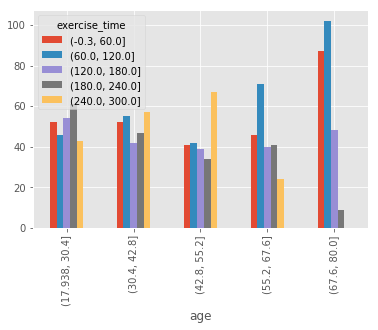

In [75]:
corr_2 = pd.crosstab(age_bins, time_bins)
corr_2.plot(kind='bar')

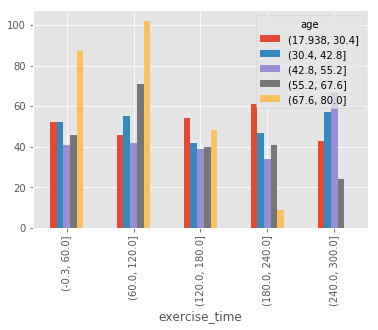

In [76]:
corr_2_1 = pd.crosstab(time_bins, age_bins)
corr_2_1.plot(kind='bar')

### Age and Weight

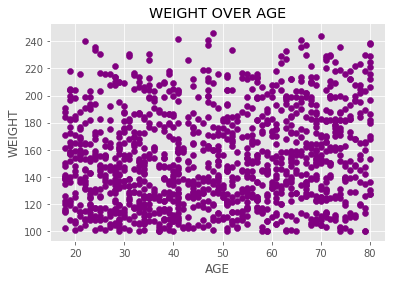

In [83]:
plt.scatter(df['age'], df['weight'], marker='o', color='purple')
plt.title('WEIGHT OVER AGE')
plt.xlabel('AGE')
plt.ylabel('WEIGHT')
plt.show()

In [57]:
#CHECKING CORRELATION BETWEEN AGE AND WEIGHT
pd.crosstab(weight_bins, age_bins)

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
weight,,,,,
"(99.854, 129.2]",80,104,78,53,60
"(129.2, 158.4]",86,62,62,71,54
"(158.4, 187.6]",49,49,49,45,66
"(187.6, 216.8]",34,31,26,44,44
"(216.8, 246.0]",7,7,8,9,22


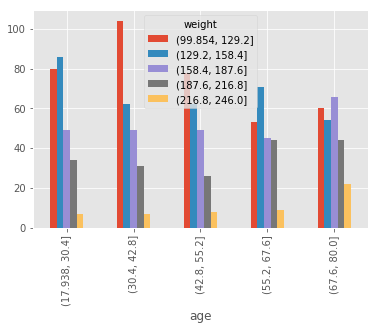

In [77]:
corr_3 = pd.crosstab(age_bins, weight_bins)
corr_3.plot(kind='bar')

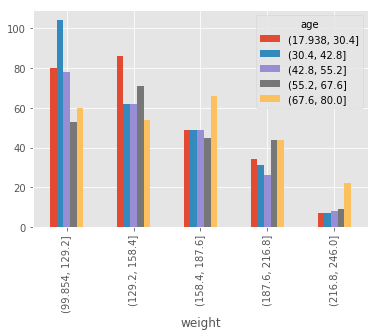

In [78]:
corr_3_1 = pd.crosstab(weight_bins, age_bins)
corr_3_1.plot(kind='bar')

## Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. The types of variables in this data set are independent and dependent variables.
Age is an independent variable. Weight and exercise time are dependent variables.

2. It seems as if age affects weight and exercise time during the last bin (67.6-80range). Otherwise it seems as if weight and exercise time have a stronger correlation. 

3. Age and weight seems spurious because weight seems evenly distributed over the age brackets. There seems to be a real relationship between exercise time and weight.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)